In [14]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Indirect Speech Act Scenario*

### **Identify and Explain Issue**

In [15]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "decision":"Speaker # or both or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [16]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [17]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [18]:
with open('../indirect_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [19]:
with open('../indirect_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'decision': 'Speaker 2',
  'explanation': 'Speaker 2 needs to improve their communication. While they have acknowledged that they know where the coffee shop is, they have not provided the requested information. This could be confusing or unhelpful to Speaker 1, who is seeking specific directions. In neurodiversity-informed communication, it is important to be clear and direct, especially in providing requested information.'},
 {'decision': 'neither',
  'explanation': 'The exchange between speaker 1 and speaker 2 is clear and effective. Speaker 1 asks a straightforward question about parking availability, and speaker 2 provides a clear and direct answer. This interaction demonstrates an efficient and functional communication pattern. Evaluating from a neurodiversity-informed stance, there is no indication that either speaker needs to improve their communication in this context. Both speakers fulfill their communicative roles appropriately.'}]

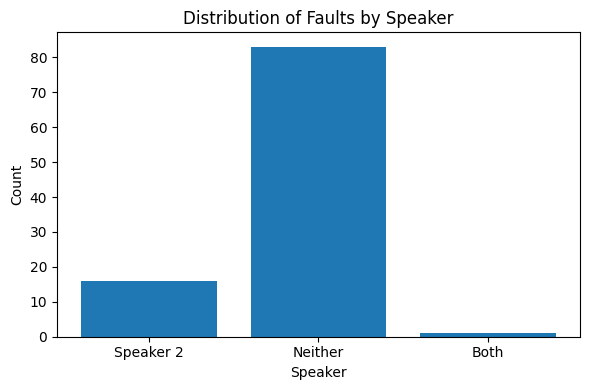

In [20]:
normalized_faults = []
for r in results_loaded:
    fault = r['decision'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [10]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [11]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [12]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [13]:
with open('../indirect_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [14]:
with open('../indirect_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Speaker 2 could provide more specific information to make the communication clearer. For instance, instead of just saying they know where the coffee shop is, they could offer directions or a more detailed response. This is especially helpful for someone who might need more explicit information, such as an autistic individual. Speaker 1’s question is clear and direct, so no additional feedback is needed for them.'},
 {'feedback': "Both speakers engaged in clear communication. However, Speaker 2's response could be enhanced with more specific information to support better understanding, such as the exact location, distance, or any important details about the parking place. For example, 'Yes, there is a place to park just across the street by the library.' Providing additional context can be especially helpful for individuals who appreciate more detailed guidance."},
 {'feedback': 'Great effort on both ends! Speaker 1, you made a clear and direct request, which is helpful f